<a href="https://colab.research.google.com/github/faridelya/CRUD-WebFlaskApp/blob/main/sultan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

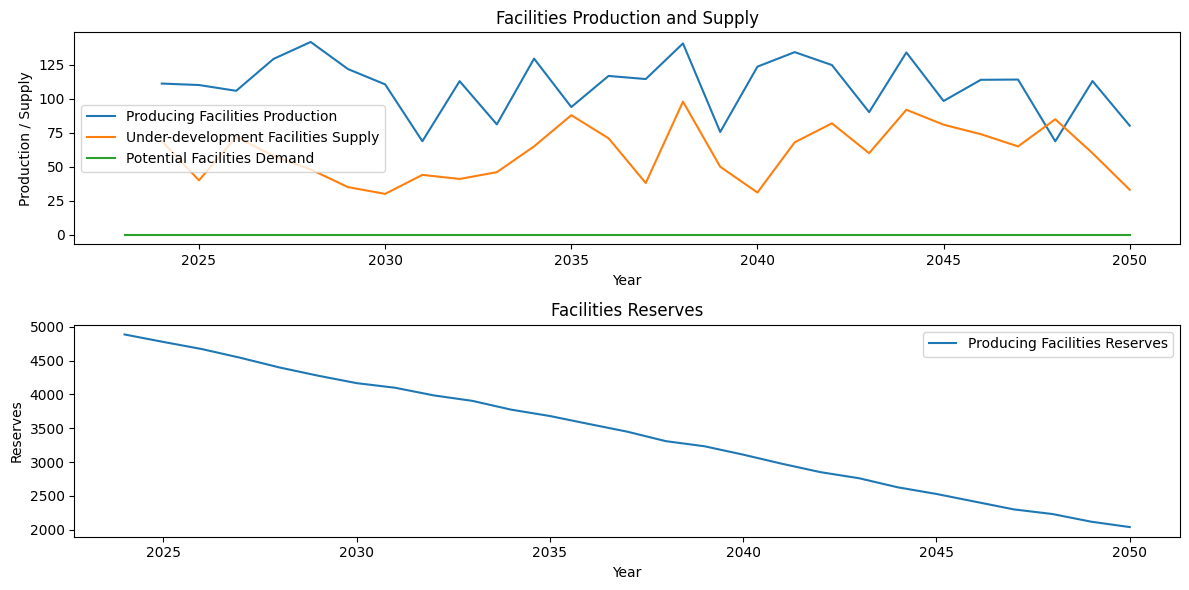

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data for producing facilities
producing_data = {
    'Year': range(2024, 2051),
    'Production': np.random.randint(70, 150, size=27),
}

df_producing = pd.DataFrame(producing_data)

# Sample data for under-development facilities
underdev_data = {
    'Year': range(2024, 2051),
    'Supply': np.random.randint(30, 100, size=27),
}

df_underdev = pd.DataFrame(underdev_data)

# Sample data for potential facilities (reserves-based)
potential_data = {
    'Year': range(2023, 2051),
    'Reserves': np.random.randint(1000, 3000, size=28),
}

df_potential = pd.DataFrame(potential_data)

# Decline rates for producing facilities
decline_rates = np.concatenate([np.random.uniform(0.02, 0.04, 7), np.random.uniform(0.04, 0.08, 10), np.random.uniform(0.08, 0.12, 10)])

# Calculate production for producing facilities
df_producing['Production'] = df_producing['Production'] * (1 - decline_rates)

# Calculate reserves for producing facilities
initial_reserves = 5000  # Initial reserves for producing facilities in 2023
df_producing['Reserves'] = initial_reserves - np.cumsum(df_producing['Production'])

# Calculate reserves life for producing facilities
df_producing['Reserves_Life'] = df_producing['Reserves'] / (df_producing['Production'].shift() * 365)
df_producing['Reserves_Life'] = df_producing['Reserves_Life'].apply(lambda x: max(x, 20))

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df_producing['Year'], df_producing['Production'], label='Producing Facilities Production')
plt.plot(df_underdev['Year'], df_underdev['Supply'], label='Under-development Facilities Supply')
plt.plot(df_potential['Year'], np.zeros(len(df_potential)), label='Potential Facilities Demand')
plt.xlabel('Year')
plt.ylabel('Production / Supply')
plt.title('Facilities Production and Supply')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df_producing['Year'], df_producing['Reserves'], label='Producing Facilities Reserves')
plt.xlabel('Year')
plt.ylabel('Reserves')
plt.title('Facilities Reserves')
plt.legend()

plt.tight_layout()
plt.show()


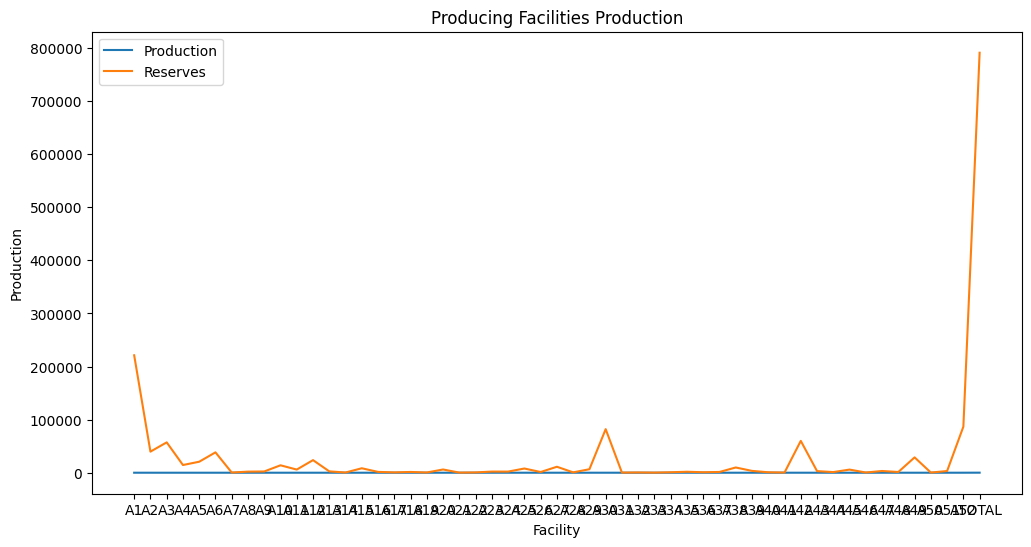

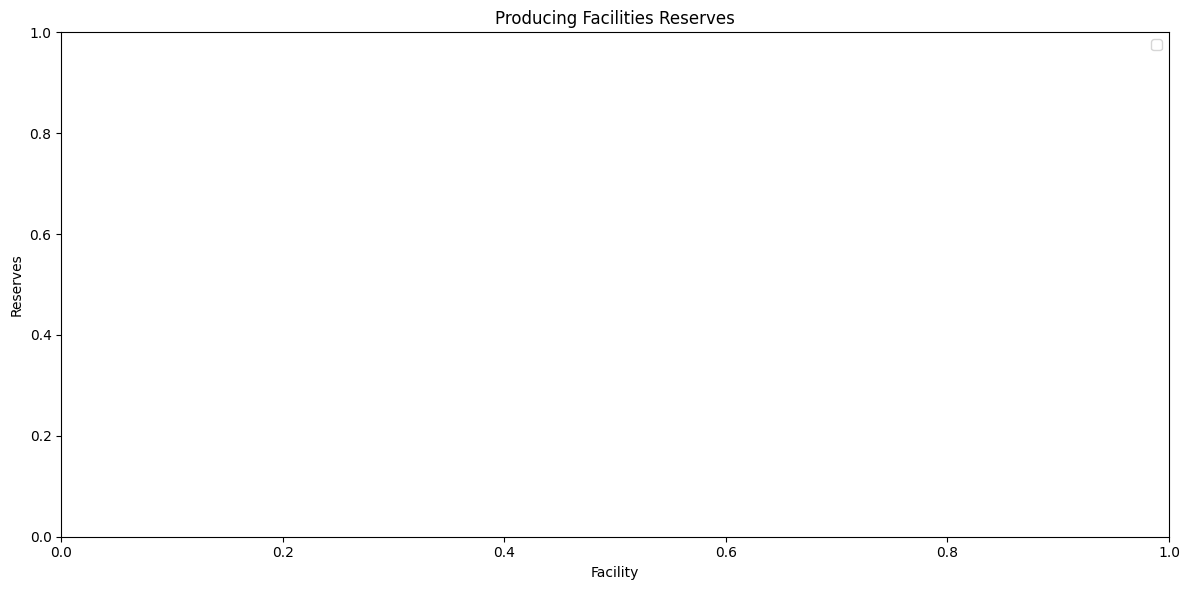

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data for producing facilities
data = {
    'Facility': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A50', 'A51', 'A52', 'TOTAL'],
    'Production': [11.372, 2.619, 4.453, 0.854, 1.67, 2.277, 0.094, 0.474, 0.421, 0.685, 0.866, 1.856, 0.743, 0.129, 1.282, 0.397, 0.147, 0.318, 0.099, 0.748, 0.091, 0, 0.602, 0.679, 2.036, 0.112, 3.32, 0.137, 2.057, 9.385, 0.086, 0.082, 0.044, 0.103, 0.52, 0.233, 0.485, 1.533, 1.037, 0.03, 0.112, 17.284, 1.1, 0.388, 0.395, 0.178, 1.122, 0.417, 3.379, 0.065, 0.625, 21.3859196227792, 100.526919622779]
}

df_producing = pd.DataFrame(data)

# Sample data for producing facilities reserves
reserves_data = {
    'Facility': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A50', 'A51', 'A52', 'TOTAL'],
    'Reserves': [221102.4, 39710.2, 57170.5, 14484.8, 20707, 38357.9, 341, 2063.6, 2353.1, 13977.7, 5924.2, 23716.9, 2569.5, 391.4, 8400.2, 1535.7, 650.5, 1427.9, 442.4, 6084.3, 211.7, 560.3, 2159.1, 2121.9, 7929.1, 1327.9, 11221.7, 672, 6563.3, 82038.9, 224.8, 490.6, 199.9, 879.4, 1827.7, 922.3, 1407.9, 9867.2, 3445.9, 851.8, 323.6, 59957.5, 3032.9, 1205.1, 5872.6, 391.3, 3259.3, 1364.9, 28886.4, 286.8, 3189.9, 86745.3999999997, 790850.3]
}

df_reserves = pd.DataFrame(reserves_data)

# Merge the producing facilities data with reserves data
df_merged = pd.merge(df_producing, df_reserves, on='Facility')

# Plotting
plt.figure(figsize=(12, 6))

# Plot production
for column in df_merged.columns[1:52]:  # Exclude 'Facility' and 'TOTAL' columns
    plt.plot(df_merged['Facility'], df_merged[column], label=column)

plt.xlabel('Facility')
plt.ylabel('Production')
plt.title('Producing Facilities Production')
plt.legend()

plt.figure(figsize=(12, 6))

# Plot reserves
for column in df_merged.columns[53:104]:  # Exclude 'Facility' and 'TOTAL' columns
    plt.plot(df_merged['Facility'], df_merged[column], label=column)

plt.xlabel('Facility')
plt.ylabel('Reserves')
plt.title('Producing Facilities Reserves')
plt.legend()

plt.tight_layout()
plt.show()


In [56]:
import pandas as pd

df= pd.read_excel('/content/drive/MyDrive/Farid/supply.xlsx', sheet_name='PRODUCING FACILITIES')
pd_reserve = pd.read_excel('/content/drive/MyDrive/Farid/supply.xlsx', sheet_name='producing reserves')
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A44,A45,A46,A47,A48,A49,A50,A51,A52,TOTAL
0,11.372,2.619,4.453,0.854,1.67,2.277,0.094,0.474,0.421,0.685,...,0.388,0.395,0.178,1.122,0.417,3.379,0.065,0.625,21.38592,100.52692


In [ ]:
pd_reserve = pd_reserve.T
pd_reserve.columns = ['2023_Reserves']
# pd_reserve

In [ ]:
transposed_df =df.T
transposed_df.columns = ['Initial_Production']
transposed_df['Facility'] = transposed_df.index
transposed_df


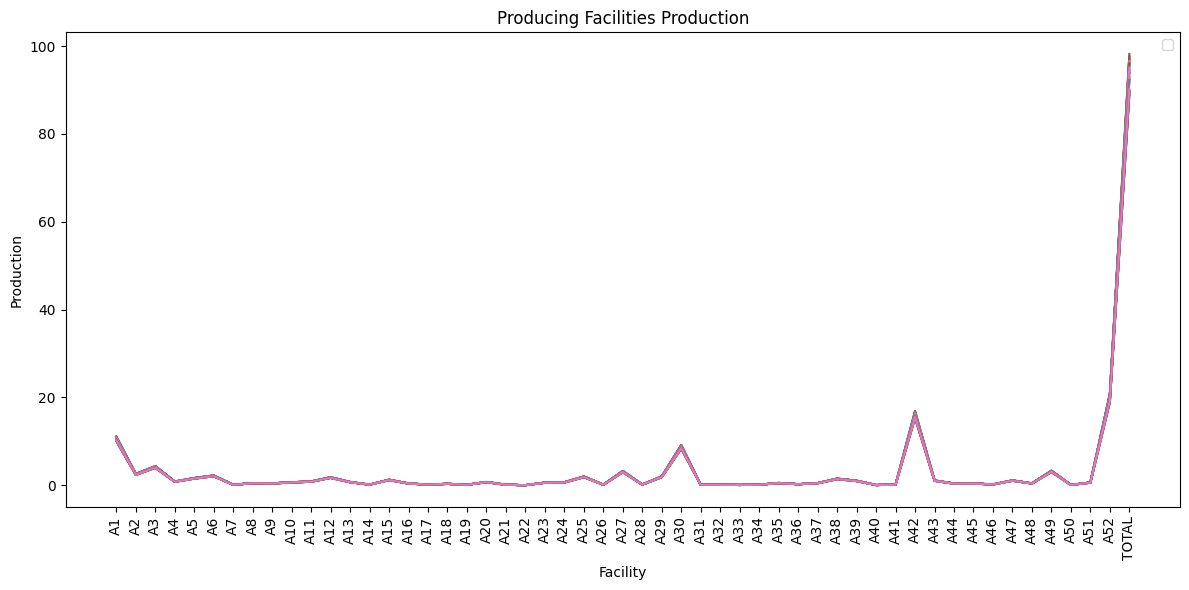

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_producing = transposed_df


# Calculate annual decline rates based on the provided characteristics
def calculate_decline_rate(year):
    if 2024 <= year <= 2030:
        return np.random.uniform(0.02, 0.04)
    elif 2031 <= year <= 2040:
        return np.random.uniform(0.04, 0.08)
    else:
        return np.random.uniform(0.08, 0.12)

# Initialize reserves for 2023
initial_reserves_2023 = pd_reserve

df_producing['2023_Reserves'] = initial_reserves_2023

# Forecast production, calculate reserves, and reserves life
for year in range(2024, 2051):
    df_producing[year] = df_producing['Initial_Production'] * (1 - calculate_decline_rate(year))
    df_producing[f'{year}_Reserves'] = df_producing[f'{year - 1}_Reserves'] - (df_producing[year] * 365)
    df_producing[f'{year}_Reserves_Life'] = df_producing[f'{year}_Reserves'] / (df_producing[f'{year}_Reserves'] * 365)
    df_producing[f'{year}_Reserves_Life'] = df_producing[f'{year}_Reserves_Life'].apply(lambda x: max(x, 20))

# Plotting
plt.figure(figsize=(12, 6))

# Plot production
for year in range(2024, 2051):
    plt.plot(df_producing['Facility'], df_producing[year] , )  #label=f'{year} Production'

plt.xlabel('Facility')
plt.ylabel('Production')
plt.title('Producing Facilities Production')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [63]:
df_producing

,Initial_Production,Facility,2023_Reserves,2024,2024_Reserves,2024_Reserves_Life,2025,2025_Reserves,2025_Reserves_Life,2026,...,2047_Reserves_Life,2048,2048_Reserves,2048_Reserves_Life,2049,2049_Reserves,2049_Reserves_Life,2050,2050_Reserves,2050_Reserves_Life
A1,11.37200,A1,221102.4,11.112046,217046.503102,20,10.943852,213051.997238,20,11.060866,...,20,10.098086,124142.264691,20,10.413510,120341.333421,20,10.406762,116542.865215,20
A2,2.61900,A2,39710.2,2.559132,38776.116815,20,2.520396,37856.172139,20,2.547345,...,20,2.325614,17380.038694,20,2.398257,16504.674730,20,2.396703,15629.878016,20
A3,4.45300,A3,57170.5,4.351208,55582.308927,20,4.285347,54018.157096,20,4.331167,...,20,3.954166,19203.257428,20,4.077679,17714.904724,20,4.075036,16227.516497,20
A4,0.85400,A4,14484.8,0.834478,14180.215411,20,0.821847,13880.241087,20,0.830635,...,20,0.758333,7203.411014,20,0.782021,6917.973509,20,0.781514,6632.720972,20
A5,1.67000,A5,20707.0,1.631825,20111.383765,20,1.607126,19524.782922,20,1.624309,...,20,1.482923,6468.218258,20,1.529244,5910.044215,20,1.528253,5352.231877,20
A6,2.27700,A6,38357.9,2.224950,37545.793314,20,2.191272,36745.978870,20,2.214702,...,20,2.021926,18943.704775,20,2.085083,18182.649508,20,2.083732,17422.087416,20
A7,0.09400,A7,341.0,0.091851,307.474296,20,0.090461,274.456045,20,0.091428,...,20,0.083470,-460.464362,20,0.086077,-491.882541,20,0.086021,-523.280361,20
A8,0.47400,A8,2063.6,0.463165,1894.544853,20,0.456154,1728.048566,20,0.461032,...,20,0.420902,-1977.826674,20,0.434049,-2136.254516,20,0.433768,-2294.579695,20
A9,0.42100,A9,2353.1,0.411376,2202.947644,20,0.405150,2055.068030,20,0.409482,...,20,0.373839,-1236.437194,20,0.385516,-1377.150530,20,0.385266,-1517.772682,20
A10,0.68500,A10,13977.7,0.669342,13733.390347,20,0.659210,13492.778624,20,0.666259,...,20,0.608265,8137.241621,20,0.627265,7908.289992,20,0.626858,7679.486728,20


In [47]:
und= pd.read_excel('/content/drive/MyDrive/Farid/supply.xlsx', sheet_name='Under development')
und_reserve = pd.read_excel('/content/drive/MyDrive/Farid/supply.xlsx', sheet_name='UD Reserves')

In [ ]:
import pandas as pd


under_dev_data = und
under_dev_reserve = und_reserve

# Define decline rates
initial_decline_rate = 0.02
steeper_decline_rate = 0.04
max_decline_rate = 0.08

# Define constants
days_per_year = 365
min_reserves_life = 20

# Initialize a dictionary to store facility data
facility_data = {}

# Iterate over years
for year in range(2024, 2051):
    # Forecast production for under-development facilities

      # Calculate production based on expected supply
      production = under_dev_data.loc[facility][f'Y{year}']

      # Calculate reserves
      reserves = under_dev_reserve.loc[facility][f'Y{year}']

      # Calculate reserves life
      reserves_life = reserves / (production * days_per_year) if production > 0 else 0

      # Ensure reserves life is maintained above 20
      if reserves_life < min_reserves_life:
          production = reserves / (min_reserves_life * days_per_year)
          reserves_life = min_reserves_life

      # Update facility's data
      facility_data[facility][year] = {'Production': production, 'Reserves': reserves, 'ReservesLife': reserves_life}

    # Forecast production for potential facilities
    # ... (same as before)

# Calculate and print total supply for each year
for year in range(2024, 2051):
    total_supply = sum([facility_data[facility][year]['Production'] for facility in all_facilities])
    print(f"Year {year}: Total Supply = {total_supply}")
